In [1]:
import os
import numpy as np
from helpers import*
from models import *   
from nan_imputation import impute_nan
import isdead

In [2]:
repo_root = find_repo_root()
repo_root

'c:\\Users\\msgar\\OneDrive\\Documents\\EPFL\\Cours\\MA1\\Machine_Learning\\ML_project2\\ML-Project-2'

This means we have the following :
X_train columns : x contains NaN values, y contains NaN values, speed doesn't contain
y_train doesn't contain NaN or inf

In [3]:
# Load the data of 1 worm
data_path = os.path.join(repo_root, 'Data/Lifespan/companyDrug/speeds_and_coordinates_20241016_1_updated.csv')
Drug_worm_2 = load_one_data(data_path,2)

2: File path is valid. Loading data...
2: Data loaded successfully.


In [4]:
# Reload isdead.py
import importlib
importlib.reload(isdead)

<module 'isdead' from 'c:\\Users\\msgar\\OneDrive\\Documents\\EPFL\\Cours\\MA1\\Machine_Learning\\ML_project2\\ML-Project-2\\isdead.py'>

In [5]:
# Check if a worm is dead
isdead.estimate_dying_time(Drug_worm_2,movement_threshold=2.0)



Detailed Output:
- The worm most probably died at the Absolute Frame 53098.
- This correspond to the frame 9902 of the 4'th segment(starts at segment).
- The estimated time of death is 348.50 hours since the start of recording.



(9902, 53098, 348.49888888888887, 4)

## Step 1 : Load the Data

In [6]:
# Reload helpers.py
import importlib
import helpers
importlib.reload(helpers)

<module 'helpers' from 'c:\\Users\\msgar\\OneDrive\\Documents\\EPFL\\Cours\\MA1\\Machine_Learning\\ML_project2\\ML-Project-2\\helpers.py'>

In [7]:
repor_root = find_repo_root()
repor_root

'c:\\Users\\msgar\\OneDrive\\Documents\\EPFL\\Cours\\MA1\\Machine_Learning\\ML_project2\\ML-Project-2'

In [8]:
# load whole data
# Define the path to the Lifespan folder

control_path = os.path.join(repo_root, 'Data/Lifespan/control')
drug_path = os.path.join(repo_root, 'Data/Lifespan/companyDrug')

# Load worms from the control folder
control_worms = load_file_data(control_path)

# Load worms from the companyDrug folder
drug_worms = load_file_data(drug_path)

Loading file: c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Lifespan/control\speeds_and_coordinates_20241016_11_updated.csv
Loading file: c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Lifespan/control\speeds_and_coordinates_20241016_12_updated.csv
Loading file: c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Lifespan/control\speeds_and_coordinates_20241016_13_updated.csv
Loading file: c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Lifespan/control\speeds_and_coordinates_20241016_14_updated.csv
Loading file: c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Lifespan/control\speeds_and_coordinates_20241016_15_updated.csv
Loading file: c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Lifespan/control\spe

## Step 2 : Split data


In [9]:
# Split control worms
train_control, test_control = split_data(control_worms, test_size=0.2)

# Split companyDrug worms
train_drug, test_drug = split_data(drug_worms, test_size=0.2)

Data split complete: 9 training worms, 3 testing worms.
Data split complete: 9 training worms, 3 testing worms.


## Step 3 : Truncate de Data : to extract the "early" lifespan of a worm

In [10]:
# Truncate to the first 20% of the lifespan for training worms
train_control_early = load_earlylifespan(train_control, data_fraction=0.2)
train_drug_early = load_earlylifespan(train_drug, data_fraction=0.2)

Truncated data to 20.0% of the lifespan for 9 worms.
Truncated data to 20.0% of the lifespan for 9 worms.


Plot saved for Control 1 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Control 1_changed_pixels_vs_time.png


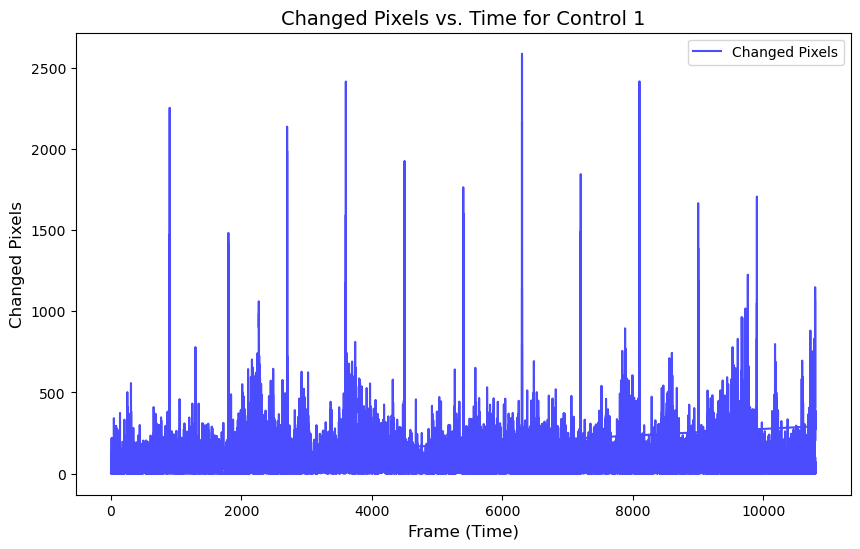

Plot saved for Control 2 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Control 2_changed_pixels_vs_time.png


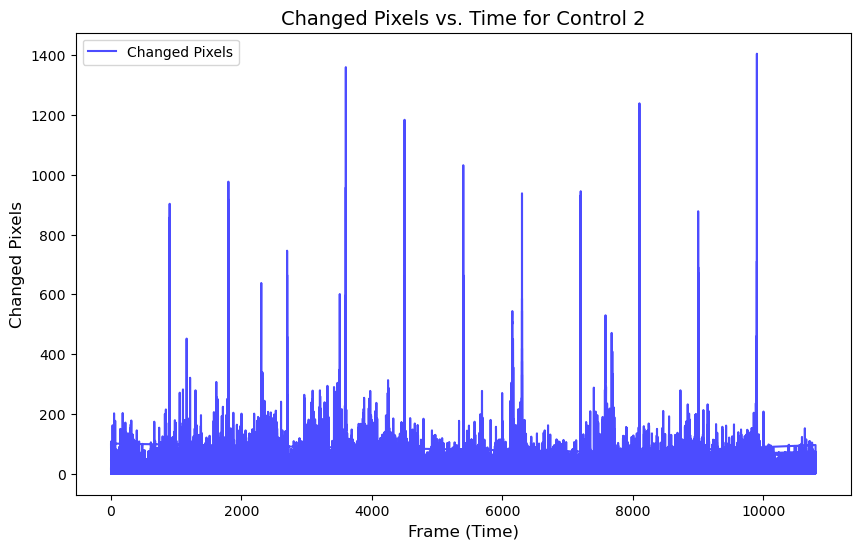

Plot saved for Control 3 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Control 3_changed_pixels_vs_time.png


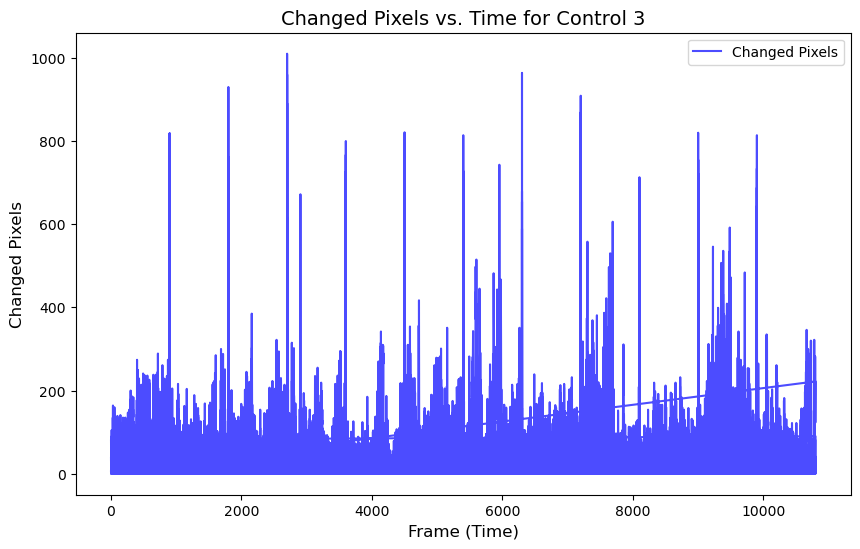

Plot saved for Control 4 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Control 4_changed_pixels_vs_time.png


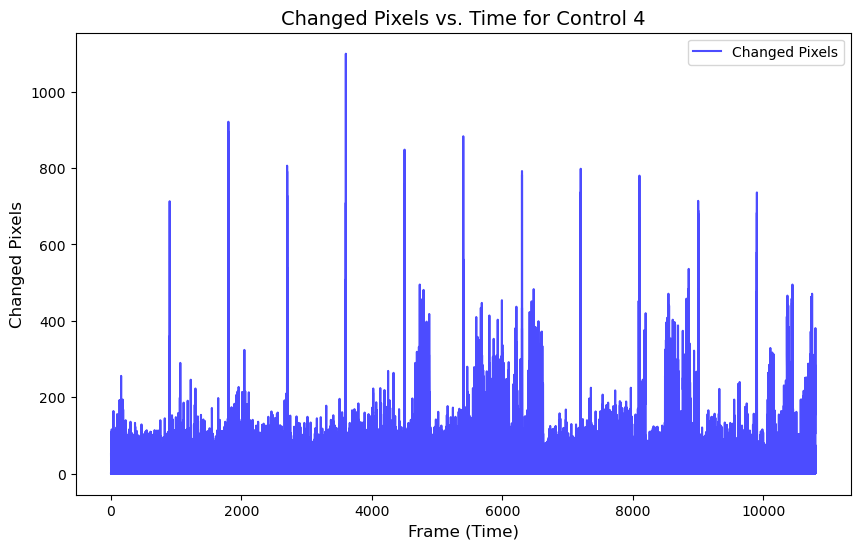

Plot saved for Control 5 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Control 5_changed_pixels_vs_time.png


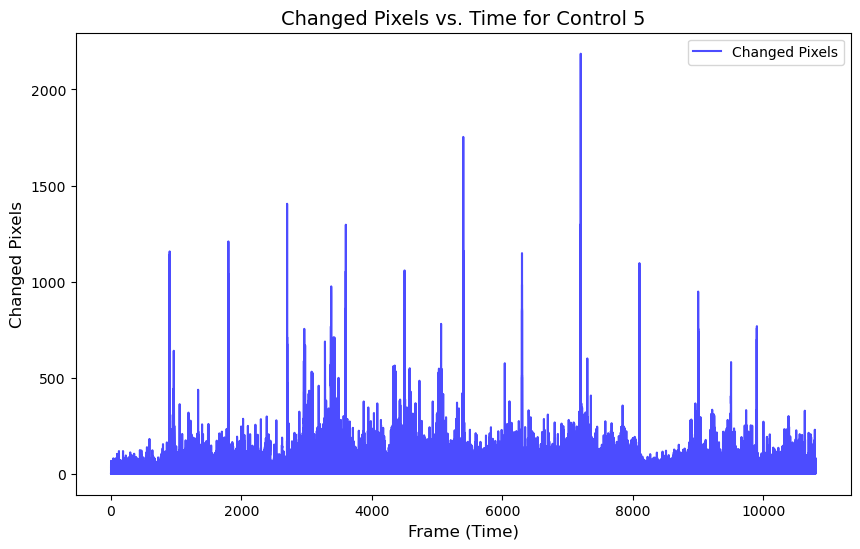

Plot saved for Control 6 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Control 6_changed_pixels_vs_time.png


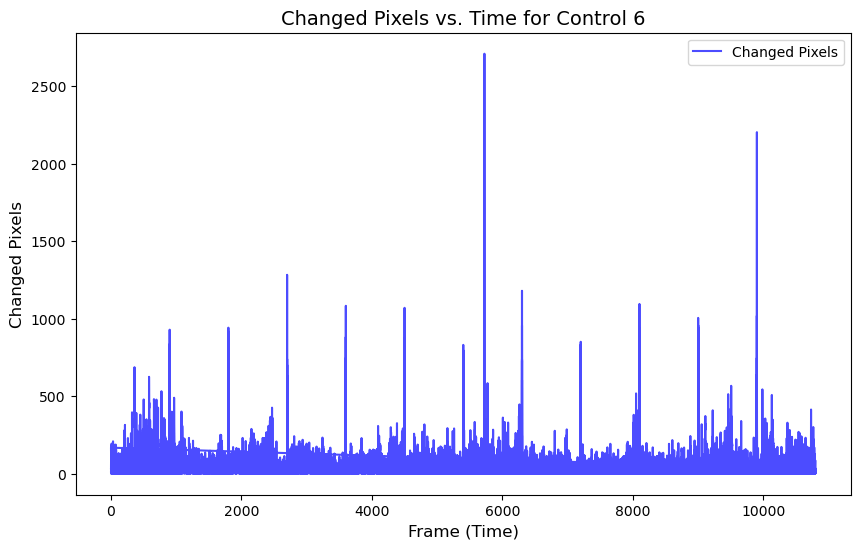

Plot saved for Control 7 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Control 7_changed_pixels_vs_time.png


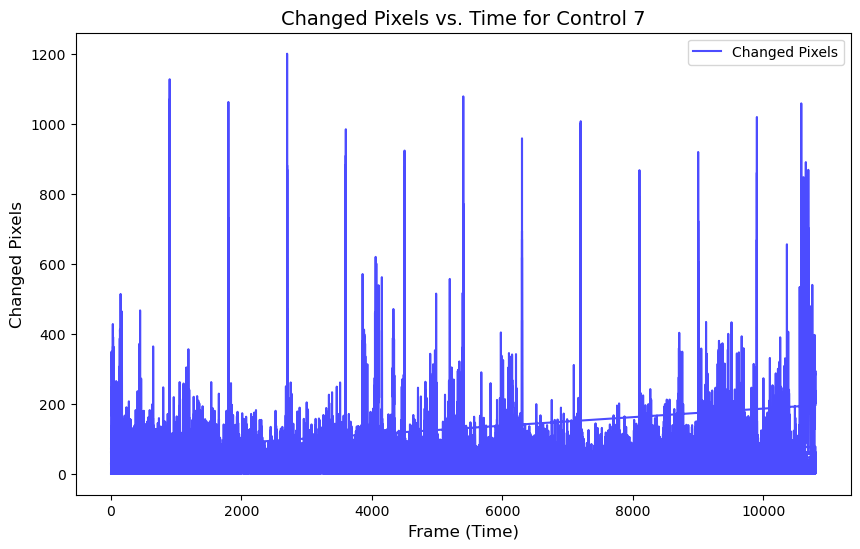

Plot saved for Control 8 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Control 8_changed_pixels_vs_time.png


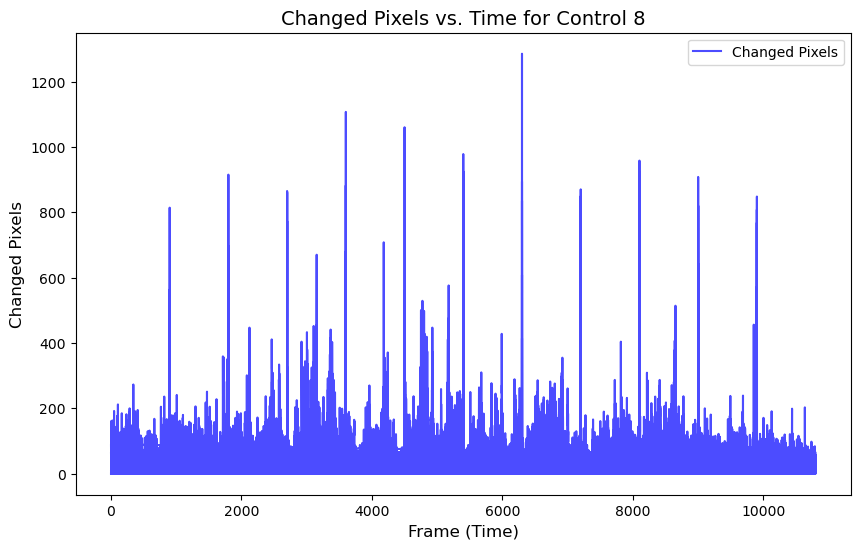

Plot saved for Control 9 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Control 9_changed_pixels_vs_time.png


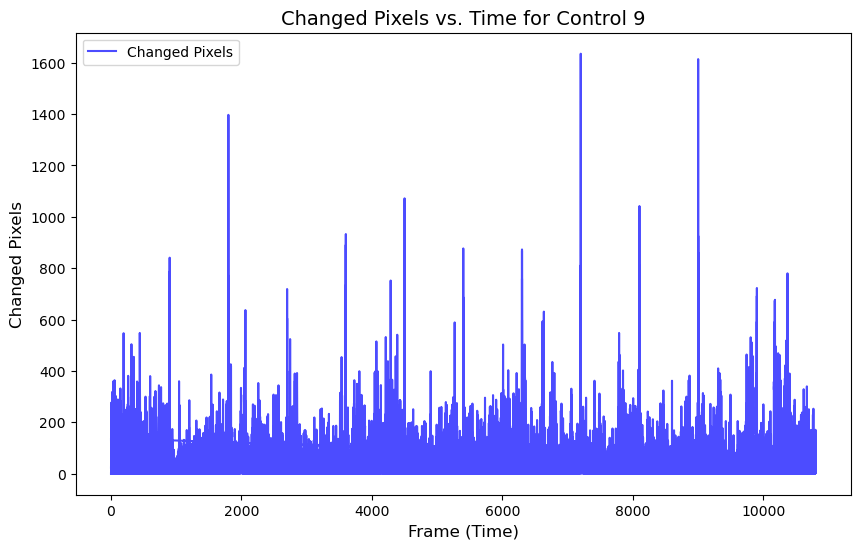

Plot saved for Drug 1 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Drug 1_changed_pixels_vs_time.png


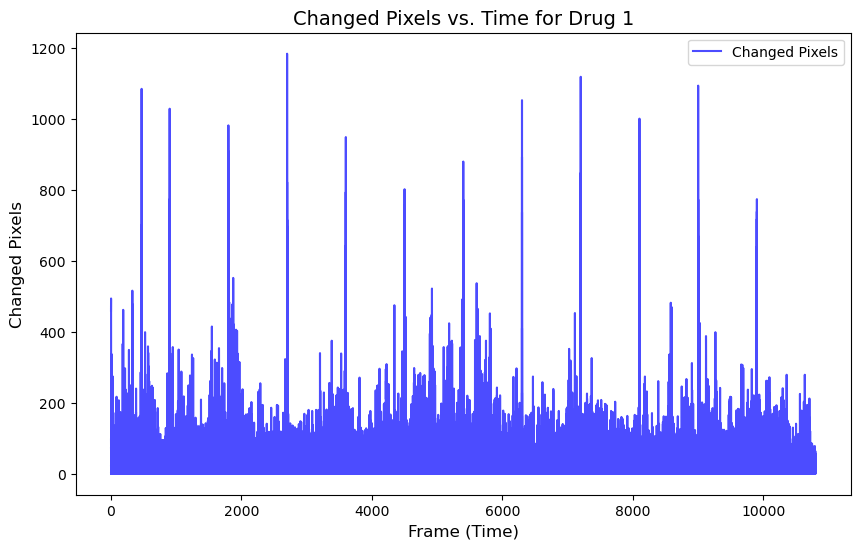

Plot saved for Drug 2 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Drug 2_changed_pixels_vs_time.png


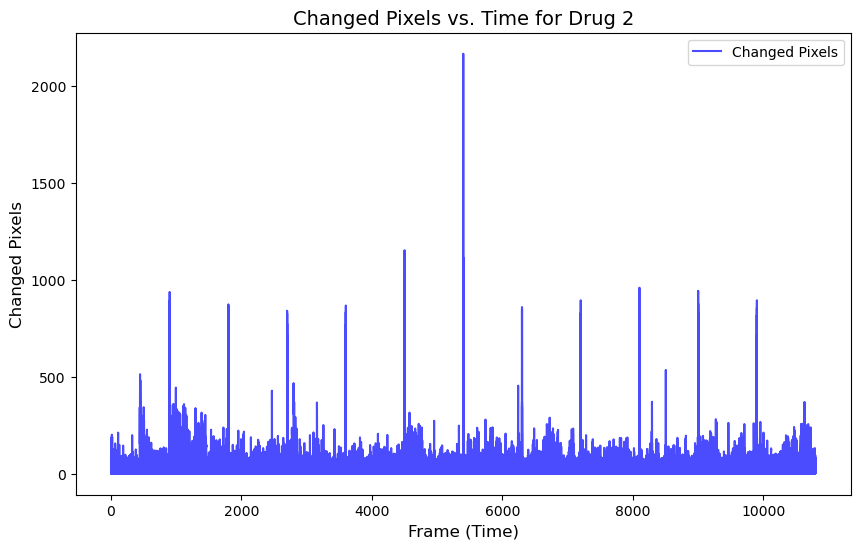

Plot saved for Drug 3 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Drug 3_changed_pixels_vs_time.png


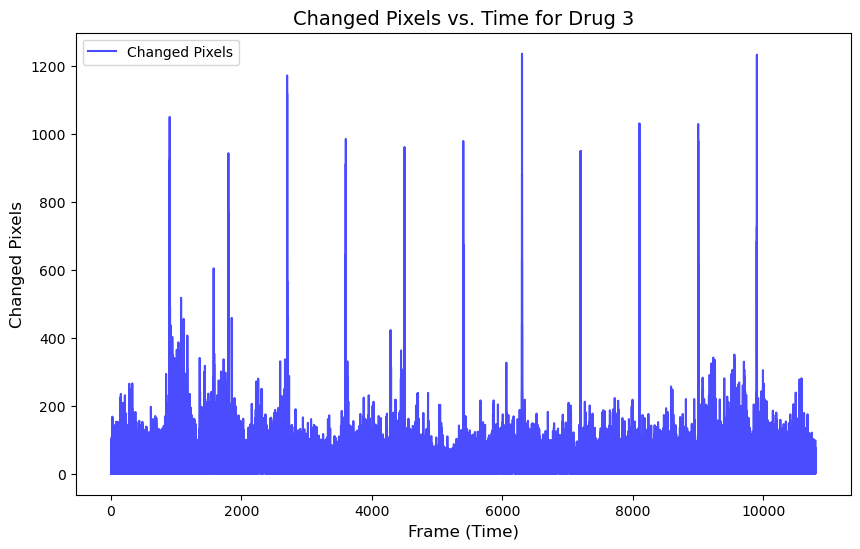

Plot saved for Drug 4 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Drug 4_changed_pixels_vs_time.png


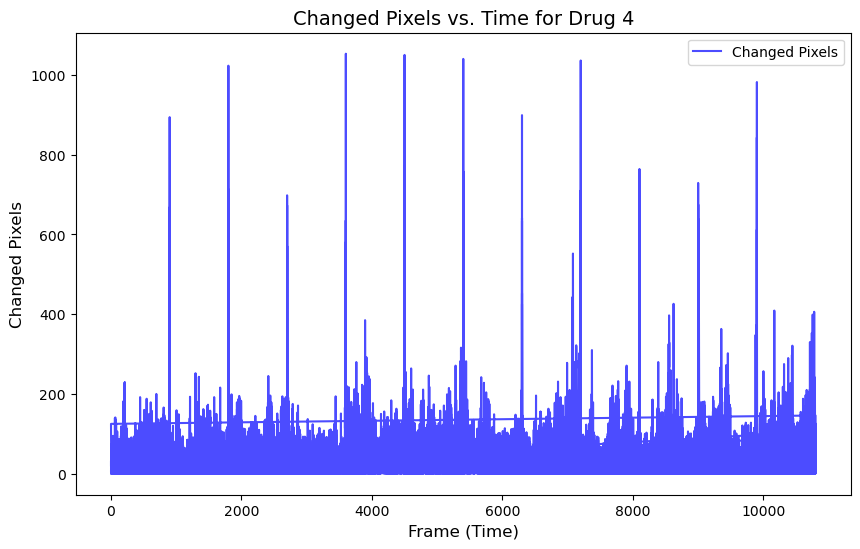

Plot saved for Drug 5 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Drug 5_changed_pixels_vs_time.png


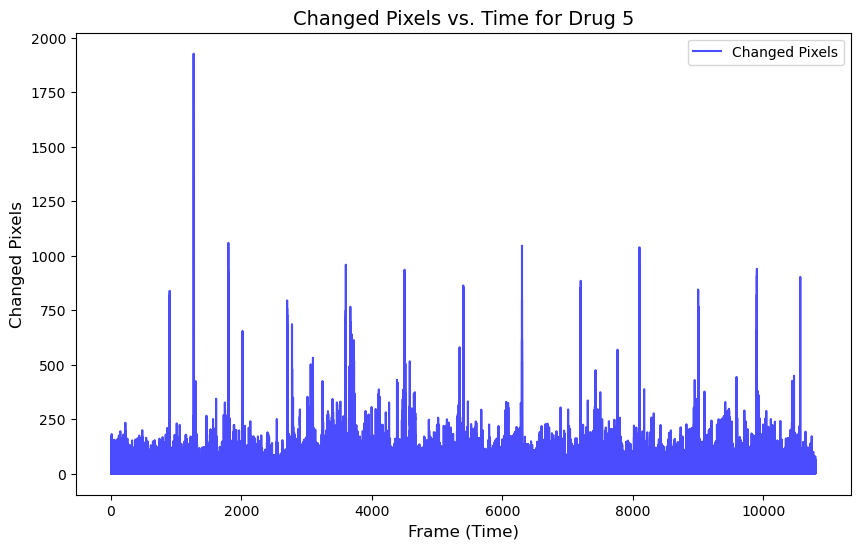

Plot saved for Drug 6 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Drug 6_changed_pixels_vs_time.png


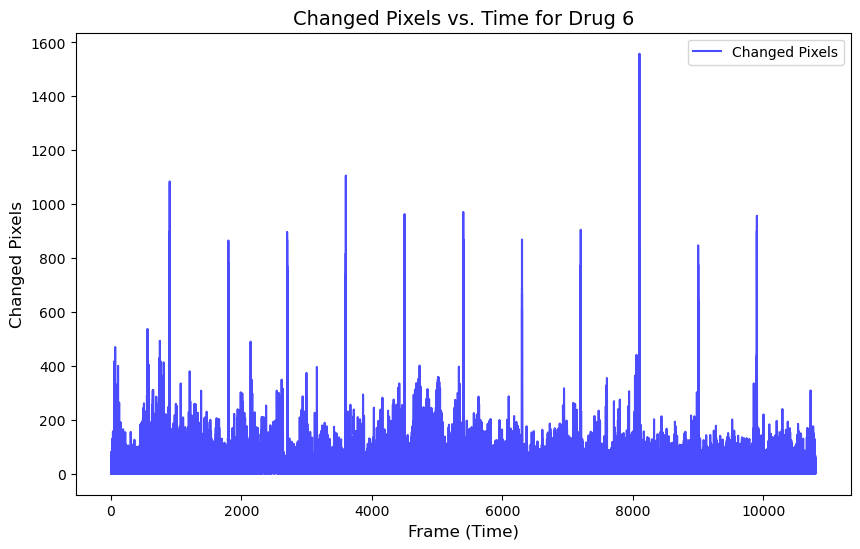

Plot saved for Drug 7 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Drug 7_changed_pixels_vs_time.png


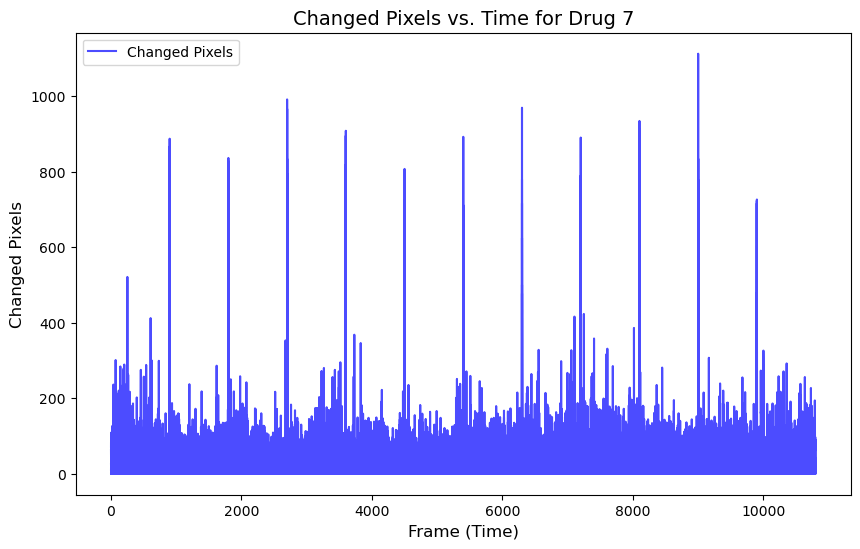

Plot saved for Drug 8 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Drug 8_changed_pixels_vs_time.png


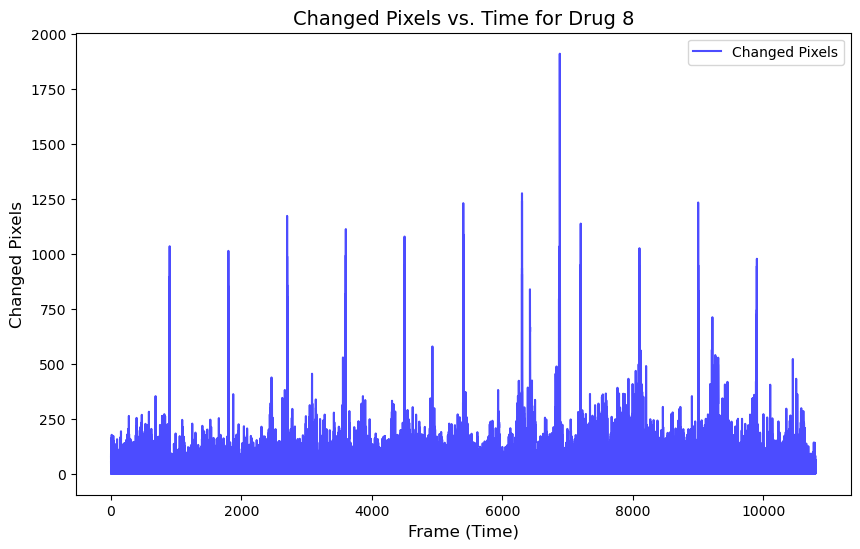

Plot saved for Drug 9 at c:\Users\msgar\OneDrive\Documents\EPFL\Cours\MA1\Machine_Learning\ML_project2\ML-Project-2\Data/Plots/changed_pixels\Drug 9_changed_pixels_vs_time.png


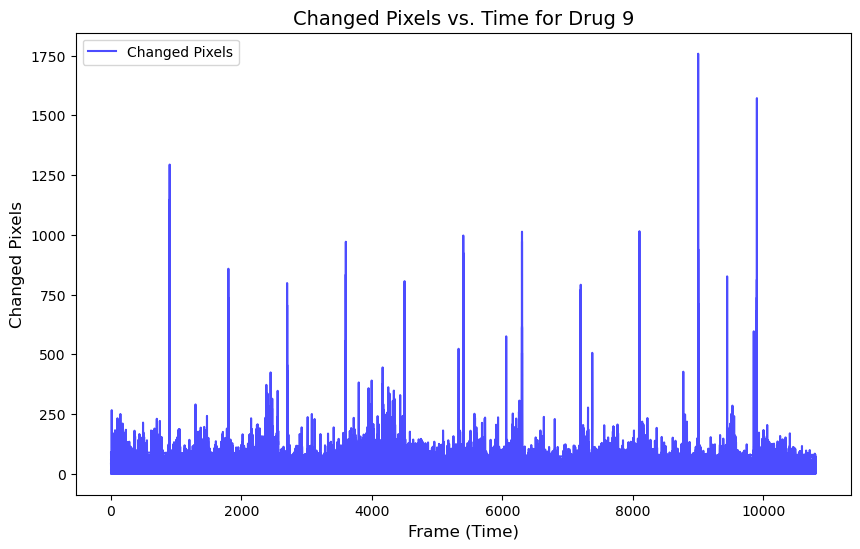

In [13]:
import matplotlib.pyplot as plt  
from helpers import plot_changed_pixels

# Define output directory if you want to save the plots
output_dir = os.path.join(repo_root, 'Data/Plots/changed_pixels')
os.makedirs(output_dir, exist_ok=True)

# Plot for control worms
plot_changed_pixels(train_control, worm_names=[f"Control {i+1}" for i in range(len(train_control_early))], output_dir=output_dir)

# Plot for drug worms
plot_changed_pixels(train_drug, worm_names=[f"Drug {i+1}" for i in range(len(train_drug_early))], output_dir=output_dir)